## Import pandas library

In [1]:
import pandas as pd

In [2]:
data_ad = pd.read_csv(r'D:\Admission_Predict.csv')

In [3]:
data_ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Some observations

In [4]:
data_ad['GRE Score'].max()

340

In [5]:
data_ad['TOEFL Score'].max()

120

### Here the target variable is the Chance of Admit column

In [6]:
data_ad.shape

(400, 9)

In [10]:
data_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
# Check the number of null values
data_ad.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Overall Statistics of the data

In [8]:
data_ad.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Drop irrelevant columns 
#### Here serial number column is not required in the analysis 

In [9]:
data_ad.drop('Serial No.', axis=1, inplace=True)

In [10]:
data_ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Seperate the matrix with features other than the target variable and store the matrix

In [11]:
data_ad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
X = data_ad.drop('Chance of Admit ', axis=1)

In [12]:
y = data_ad['Chance of Admit ']

In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

## Split the data into training and testing 

In [15]:
# module for splitting the data 
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test , y_train, y_test, = train_test_split(X, y, test_size=0.20,random_state=42)

In [17]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


#### Here we have the dataset but not not in same scale. There are high differences in feature points. For the model to work properly whole dataset has to be on the same scale. Hence Feature Scaling is implemented

In [18]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [19]:
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)     ## here the data is already fitted in scale from step one. Hence simply transform.

In [21]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [22]:
X_test

array([[-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
        -0.79612211,  0.92761259],
       [-0.51865083, -0.90435307, -0.057308  ,  1.10763663,  0.61348253,
         0.08881255,  0.92761259],
       [ 2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,  0.61348253,
         1.72253809,  0.92761259],
       [ 0.72322823,  0.09240806,  0.81595675,  1.10763663,  0.61348253,
         0.80356748,  0.92761259],
       [-1.4057073 , -1.73498736, -0.93057275, -0.36308421, -0.50194025,
        -1.2045535 ,  0.92761259],
       [ 2.05381293,  1.25529606,  1.6892215 ,  1.10763663,  1.17119391,
         1.46726848,  0.92761259],
       [-1.76052989, -1.90111421, -0.93057275, -0.85332449, -2.17507441,
        -1.18753552, -1.07803625],
       [-1.22829601, -1.40273364, -0.057308  , -1.34356476, -1.05965163,
        -1.57894893, -1.07803625],
       [-0.42994518, -0.40597251, -0.93057275, -1.34356476, -1.05965163,
        -0.23452896, -1.07803625],
       [ 0.54581693,  0.9230

## Model Implementation

#### First using Regression method and second using Classification method

In [23]:
data_ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Values are continuous manner hence we use different Regression model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [26]:
y1 = lr.predict(X_test)
y2 = svm.predict(X_test)
y3 = rf.predict(X_test)
y4 = gr.predict(X_test)

#### Model Evaluation 

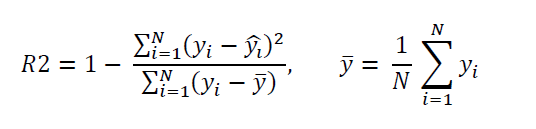
where R2 Score is between 0 and 1, the closer to 1, the better the fit.

In [27]:
from sklearn import metrics

In [28]:
s1 = metrics.r2_score(y_test,y1)
s2 = metrics.r2_score(y_test,y2)
s3 = metrics.r2_score(y_test,y3)
s4 = metrics.r2_score(y_test,y4)

In [29]:
print("Accuracy of Linear Regression:",s1,'\n',"Accuracy of SVR:",s2,'\n',"Accuracy of RandomForestRegressor:",s3,'\n',"Accuracy of GradientBoostingRegressor:",s4)

Accuracy of Linear Regression: 0.8212082591486991 
 Accuracy of SVR: 0.7597814848647668 
 Accuracy of RandomForestRegressor: 0.7968206402270231 
 Accuracy of GradientBoostingRegressor: 0.7974824245404055


Dataframe to compare different scores

In [30]:
final = {'Models':['LR','SVM','RFR','GBR'], 'Scores':[s1,s2,s3,s4]}

In [31]:
data1 = pd.DataFrame(final)

In [32]:
data1

,Models,Scores
0,LR,0.821208
1,SVM,0.759781
2,RFR,0.796821
3,GBR,0.797482


##### Visualizing Through Graphs

In [75]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='Scores'>

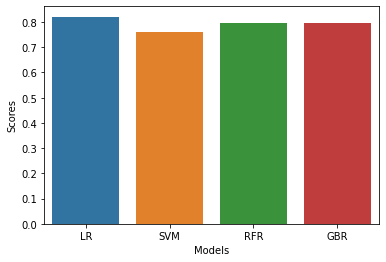

In [39]:
sns.barplot(data1['Models'], data1['Scores'])

### Classification Models

In [40]:
data_ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### For classification tasks we have to convert 'Chance of Admit ' to categorical variable 
#### we have set threshold = 0.8 i.e. if value is greater than 0.8 than 1 otherwise 0

In [41]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]

In [42]:
import numpy as np

In [43]:
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Import the models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score  # to know the performance of different models

In [45]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
yc1 = lr.predict(X_test)
print("LR score:", accuracy_score(y_test,yc1))

LR score: 0.925


In [46]:
svc = svm.SVC()
svc.fit(X_train,y_train)
yc2 = svc.predict(X_test)
print("SVC score:", accuracy_score(y_test, yc2))

SVC score: 0.925


In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
yc3 = knn.predict(X_test)
print("KNN score:", accuracy_score(y_test, yc3))

KNN score: 0.8875


In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
yc4 = rfc.predict(X_test)
print("RandomForestClassifier score:", accuracy_score(y_test, yc4))

RandomForestClassifier score: 0.9375


In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
yc5 = gbc.predict(X_test)
print("GradientBoostingClassifier score:", accuracy_score(y_test, yc5))

GradientBoostingClassifier score: 0.975


#### Visualizing graphs 

In [50]:
finalc = {'Models':['LR','SVM','KNC','RFC','GBC'],'SCORES':[accuracy_score(y_test,yc1),accuracy_score(y_test,yc2),accuracy_score(y_test,yc3),accuracy_score(y_test,yc4),accuracy_score(y_test,yc5)]}

In [51]:
data2 = pd.DataFrame(finalc)

<AxesSubplot:xlabel='Models', ylabel='SCORES'>

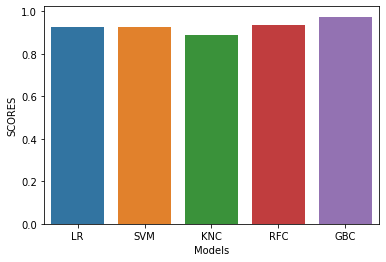

In [53]:
sns.barplot(data2['Models'], data2['SCORES'])

#### Save our best model
#### We have to train our model on entire dataset 

In [55]:
data_ad.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [56]:
X = data_ad.drop('Chance of Admit ', axis=1)

In [57]:
X 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [59]:
y = data_ad['Chance of Admit ']

##### Convert y into categorical value

In [61]:
y = [1 if value>0.8 else 0 for value in y]

In [62]:
y

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [64]:
y = np.array(y)


y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

##### Now Scale X

In [65]:
X = sc.transform(X)

In [66]:
X

array([[ 1.78769599,  1.75367663,  0.81595675, ...,  1.17119391,
         1.80762796,  0.92761259],
       [ 0.63452258, -0.07371879,  0.81595675, ...,  1.17119391,
         0.48022596,  0.92761259],
       [-0.07512259, -0.57209936, -0.057308  , ...,  0.05577114,
        -1.0003378 ,  0.92761259],
       ...,
       [ 1.16675646,  1.42142291,  0.81595675, ...,  1.17119391,
         1.46726848,  0.92761259],
       [-0.42994518, -0.73822622, -0.057308  , ...,  0.61348253,
         0.32706419, -1.07803625],
       [ 1.43287341,  1.58754977,  0.81595675, ...,  0.61348253,
         1.82464594,  0.92761259]])

In [67]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

In [68]:
import joblib

In [69]:
joblib.dump(gbc, 'Admission_Predict')

['Admission_Predict']

In [70]:
model = joblib.load('Admission_Predict')

In [72]:
data_ad.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [77]:
model.predict(sc.transform([[340,113,3,4.5,4.5,9.00,1]]))

array([1])

## GUI

In [78]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [80]:
def prediction():
    v1 = float(t1.get())
    v2 = float(t2.get())
    v3 = float(t3.get())
    v4 = float(t4.get())
    v5 = float(t5.get())
    v6 = float(t6.get())
    v7 = float(t7.get())
    
    model = joblib.load('Admission_Predict')
    result = model.predict(sc.transform([[v1,v2,v3,v4,v5,v6,v7]]))
    if result == 1:
        label = Label(root, text="High chance of getting admission !").grid(row=31)
    else:
        label = Label(root, text="Less chance of getting admission").grid(row=31)

root = Tk()
root.title("Admit")
label = Label(root,text="ADMIT",fg="green").grid(row=0,columnspan=2)

t1 = Entry(root,width=350)
t1.grid(row=0,column=1)
t2 = Entry(root,width=350)
t2.grid(row=1,column=1)
t3 = Entry(root,width=350)
t3.grid(row=2,column=1)
t4 = Entry(root,width=350)
t4.grid(row=3,column=1)
t5 = Entry(root,width=350)
t5.grid(row=4,column=1)
t6 = Entry(root,width=350)
t6.grid(row=5,column=1)
t7 = Entry(root,width=350)
t7.grid(row=6,column=1)

Label(root, text="Enter your GRE score").grid(row=0,column=0)
Label(root, text="Enter your TOEFL score").grid(row=1,column=0)
Label(root, text="Enter your University Rating").grid(row=2,column=0)
Label(root, text="Enter SOP").grid(row=3,column=0)
Label(root, text="Enter LOR").grid(row=4,column=0)
Label(root, text="Enter your GPA").grid(row=5,column=0)
Label(root, text="Research").grid(row=6,column=0)

Button(root, text="Predict",command=prediction).grid(row=8,column=0)
mainloop()